# Regresión - Experimentación con modelos adicionales

En el cuaderno anterior, usamos modelos de regresión simples para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar nuestro rendimiento de regresión.

Comencemos cargando los datos de bicicletas compartidas como un **Pandas** DataFrame y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [4]:
# Módulos que necesitamos para este nootbook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cargando los datos de entrenamiento
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv"
bike_data = pd.read_csv(url)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Características y etiquetas separadas
# Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las caracteríticas, y **y** que contienen las etiquetas.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Dividir datos 70%-30% en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Conjunto de entrenamiento: %d filas\nConjunto de prueba: %d filas' % (X_train.shape[0], X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Conjunto de entrenamiento: 511 filas
Conjunto de prueba: 220 filas


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train** : los valores de características que usaremos para entrenar el modelo
- **y_train** : las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test** : los valores de características que usaremos para validar el modelo
- **y_test** : las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listo para entrenar un modleo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

## Experimenta con algoritmos

El algoritmo de regresión lineal que usamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmos de regresión que podríamos probar, incluidos:
- **Algoritmos lineales** : no solo el algoritmo de regresión lineal que usamos anteriormente (que técnicamente es un algoritmo de *mínimos cuadrados ordinarios* ), sino otras variantes como *Lasso* y *Ridge*.
- **Algoritmos basados en árboles** : algoritmo que construyen un árbol de decisiones para llegar a una predicción. 
- **Algoritmos de conjunto** : algoritmos que combinan los resultados de varios algoritmos de base para mejorar la generalización.

> **Nota** : para obtener una lista completa de los estimadores de Scikit-Learn que encapsulan algoritmos para el aprendizaje automático supervisado, consulte la [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html). Hay muchos algoritmos para elegir, pero para la mayoría de los escenarios del mundo real, la [Scikit-Learn estimator cheat sheet](https://scikitlearn.org/stable/tutorial/machine_learning_map/index.html) puede ayudarlo a encontrar un punto de partida adecuado. 

## Pruebe con otro algoritmo lineal

Intentemos entrenar nuestro modelo de regresión usando un algoritmo **Lasso**. Podemos hacer esto simplemente cambiando el estimador en el código de entrenamiento.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


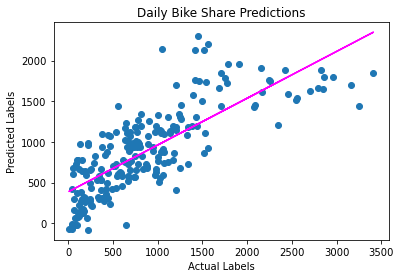

In [5]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Pruebe un algoritmo de árbol de decisión

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque badado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da como resultado una *rama* en un *árbol de decisión* basado en el valor de características. Al final de cada serie de ramas hay nodos hoja con el valor de etiqueta predicho una función de valores de las características. 

Es más fácil ver cómo funciona esto con un ejemplo. Entrenemos un modelo de regresión de árbol de desición utilizando los datos de alquileres de bicicletas. Después de entrenar el modleo, el siquiente código imprimirá la definición del modelo y una representación de texto del árbol que usa para predecir los valores de las etiquetas.



In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |--- val

Así que ahora tenemos un modelo basado en árboles; pero es bueno? Vamos a evaluarlo con los datos de prueba.

MSE: 218421.27272727274
RMSE: 467.3556169848317
R2: 0.5717988037328949


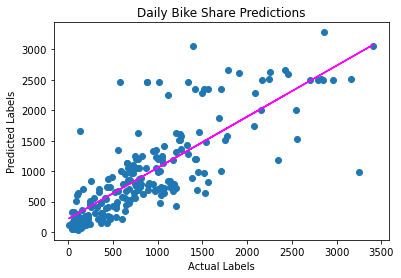

In [7]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, entonces, ¿qué más podemos probar?

## Pruebe un algoritmo de conjunto

Los algoritmos de conjunto funcionan mediante la combinación de múltiples estimadores base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces denominada embolsado ) o construyendo una secuencia de modelos que se complementan entre sí para mejorar el rendimiento predictivo ( conocido como refuerzo ).

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promedio a varios modelos de árboles de decisión para obtener un mejor modelo general.

RandomForestRegressor() 

MSE: 115255.13632363637
RMSE: 339.49246872889
R2: 0.7740495390697031


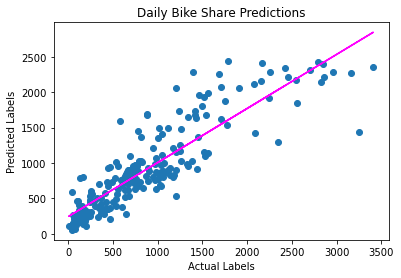

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Por si acaso, probemos también un algoritmo de conjunto potenciador . Usaremos un estimador Gradient Boosting, que al igual que un algoritmo Random Forest construye múltiples árboles, pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se construye sobre los resultados del anterior en un intento de reducir gradualmente el pérdida (error) en el modelo.

GradientBoostingRegressor() 

MSE: 104095.82337927936
RMSE: 322.63884356859353
R2: 0.7959266716979849


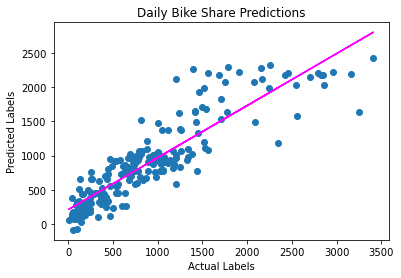

In [9]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Resumen
Aquí hemos probado una serie de nuevos algoritmos de regresión para mejorar el rendimiento. En nuestro cuaderno, veremos cómo "ajustar" estos algoritmos para mejorar el rendimiento.

## Otras lecturas
Para obtener más información sobre Scikit-Learn, consulte la [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).